In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# On MAC
df = pd.read_csv('/Users/ashokeerthi/Desktop/Upgrad-Data Science/Statistics_and_EDA/Module6-Uber-Supply Demand Gap/Uber Request Data.csv')

# Step --- 001
# Clean the Data

# Check for expected datetime columns, in this case; 'Request timestamp', 'Drop timestamp'
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

# dropping the duplicates -- though no duplicates present
df = df.drop_duplicates()

# Getting only the time Of Day of Pickup Point to view the frequency throughout the day
df['Request timeOfDay'] = df['Request timestamp'].dt.time
df['Request Date'] = df['Request timestamp'].dt.date

df['Request wkOfDay'] = df['Request timestamp'].dt.date.apply(lambda x: calendar.day_name[x.weekday()])

df['No of Requests'] = 1
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timeOfDay,Request Date,Request wkOfDay,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,2016-11-07,Monday,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,2016-11-07,Monday,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,2016-12-07,Wednesday,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,2016-12-07,Wednesday,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday,1


In [2]:
dfTotal = df.groupby(by = ['Status'])['Request id'].count().reset_index()
dfTotal.head()

,Status,Request id
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


Text(0.5, 1.0, 'Avg Uber Supply Demand Analysis per given date')

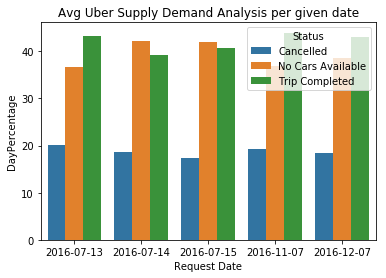

In [3]:
dfGrp = df.groupby(by = ['Request Date', 'Status'])['No of Requests'].count().reset_index()
dfGrp

reqPrcntageList = list()
for x in dfGrp.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrp.loc[x, 'No of Requests'] * 100 /  sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]), 2))

dfGrp['DayPercentage'] = reqPrcntageList
dfGrp

sns.barplot(x = 'Request Date', y = 'DayPercentage', hue = 'Status', data = dfGrp)
plt.title('Avg Uber Supply Demand Analysis per given date')

Text(0.5, 1.0, 'Average Uber Supply Demand Analysis per the day of Week')

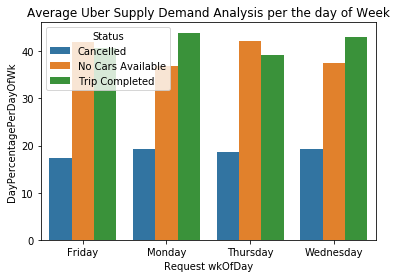

In [5]:
dfGrp = df.groupby(by = ['Request wkOfDay', 'Status'])['No of Requests'].count().reset_index()


reqPrcntageList = list()
for x in dfGrp.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrp.loc[x, 'No of Requests'] * 100 /  sum(dfGrp['No of Requests'].loc[dfGrp['Request wkOfDay'] == dfGrp.loc[x, 'Request wkOfDay']]), 2))

dfGrp['DayPercentagePerDayOfWk'] = reqPrcntageList
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentagePerDayOfWk', hue = 'Status', data = dfGrp)
plt.title('Average Uber Supply Demand Analysis per the day of Week')

Text(0, 0.5, 'Avg calcuations per day')

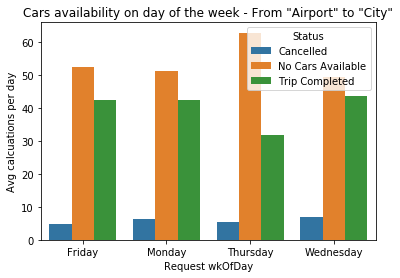

In [10]:
# Analysing Cars availability from 'Airport To City' and 'City To Airport' prespective.

dfGrp = df.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
dfGrpAirport = dfGrp.loc[dfGrp['Pickup point'] == 'Airport'].reset_index()

reqPrcntageList = list()
for x in dfGrpAirport.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrpAirport.loc[x, 'No of Requests'] * 100 /  sum(dfGrpAirport['No of Requests'].loc[dfGrpAirport['Request wkOfDay'] == dfGrpAirport.loc[x, 'Request wkOfDay']]), 2))

dfGrpAirport['DayPercentage'] = reqPrcntageList
dfGrpAirport


sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = dfGrpAirport)
plt.title('Cars availability on day of the week - From "Airport" to "City"')
plt.ylabel('Avg calcuations per day')

Text(0, 0.5, 'Avg calcuations per day')

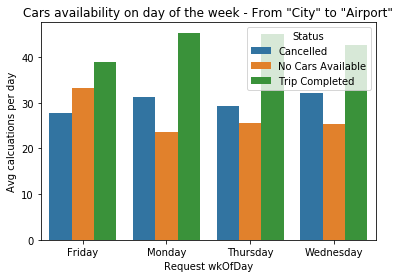

In [12]:
dfGrp = df.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
dfGrpCity = dfGrp.loc[dfGrp['Pickup point'] == 'City'].reset_index()

reqPrcntageList = list()
for x in dfGrpCity.index:
    reqPrcntageList.append(round(dfGrpCity.loc[x, 'No of Requests'] * 100 /  sum(dfGrpCity['No of Requests'].loc[dfGrpCity['Request wkOfDay'] == dfGrpCity.loc[x, 'Request wkOfDay']]), 2))

dfGrpCity['DayPercentage'] = reqPrcntageList
dfGrpCity

sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = dfGrpCity)
plt.title('Cars availability on day of the week - From "City" to "Airport"')
plt.ylabel('Avg calcuations per day')

Text(0, 0.5, 'Total number of orders')

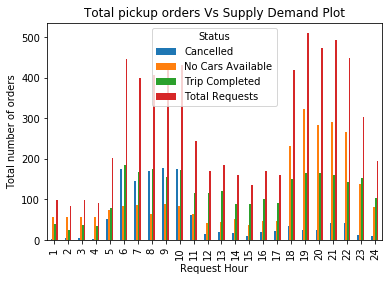

In [18]:
df['Request Hour'] = df['Request timestamp'].dt.hour + 1
dfGrp = df.groupby(by = ['Status', 'Request Hour'])['No of Requests'].count().unstack()

#dfGrp.T.plot(kind ='bar')

dfGrp = dfGrp.T
dfGrp['Total Requests'] = dfGrp['Cancelled'] + dfGrp['No Cars Available'] + dfGrp['Trip Completed']
dfGrp.plot(kind = 'bar')
plt.title('Total pickup orders Vs Supply Demand Plot')
plt.ylabel('Total number of orders')

Text(0.5, 1.0, 'Exact Supply Demand Gap')

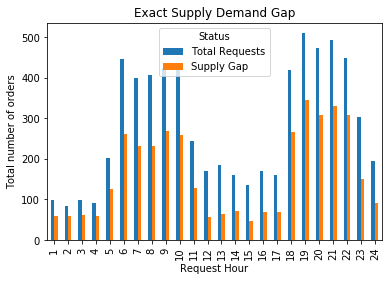

In [21]:
dfGrp['Supply Gap'] = dfGrp['Total Requests'] - dfGrp['Trip Completed']
dfGrpSubSet = dfGrp.loc[:, ['Total Requests', 'Supply Gap']]
dfGrpSubSet.plot(kind = 'bar')
plt.ylabel('Total number of orders')
plt.title('Exact Supply Demand Gap')

In [29]:
dfGrp1 = df.groupby(by = ['Pickup point', 'Status', 'Request Hour'])['No of Requests'].count().unstack()
dfGrp1 = dfGrp1.fillna(0)
dfGrp1

Request Hour                      1     2     3     4     5      6      7   \
Pickup point Status                                                          
Airport      Cancelled           0.0   0.0   0.0   0.0   2.0    4.0    4.0   
             No Cars Available  30.0  29.0  25.0  30.0  34.0    3.0    4.0   
             Trip Completed     23.0  13.0  16.0  15.0  36.0   85.0   81.0   
City         Cancelled           3.0   4.0   5.0   2.0  49.0  172.0  141.0   
             No Cars Available  26.0  27.0  32.0  26.0  40.0   81.0   82.0   
             Trip Completed     17.0  12.0  21.0  19.0  42.0  100.0   86.0   

Request Hour                       8      9      10  ...     15    16    17  \
Pickup point Status                                  ...                      
Airport      Cancelled            5.0    2.0    8.0  ...    6.0  11.0  14.0   
             No Cars Available    3.0    4.0    7.0  ...    7.0  13.0   9.0   
             Trip Completed      75.0   67.0   74.0  ...   37.0  52.0  38.0   
City         Cancelled          164.0  176.0  167.0  ...    5.0  10.0   8.0   
             No Cars Available   60.0   86.0   76.0  ...   30.0  35.0  37.0   
             Trip Completed      99.0   88.0   99.0  ...   51.0  50.0  53.0   

Request Hour                       18     19     20     21     22     23    24  
Pickup point Status                                                             
Airport      Cancelled           19.0   15.0   15.0   29.0   28.0    3.0   0.0  
             No Cars Available  215.0  309.0  268.0  275.0  254.0  100.0  36.0  
             Trip Completed      74.0   81.0   83.0   74.0   61.0   80.0  62.0  
City         Cancelled           16.0    9.0    9.0   12.0   14.0    9.0  10.0  
             No Cars Available   17.0   13.0   15.0   15.0   11.0   38.0  45.0  
             Trip Completed      77.0   83.0   83.0   87.0   81.0   74.0  41.0  

[6 rows x 24 columns]

Text(0.5, 1.0, 'Supply Demand plot for the day at Airport')

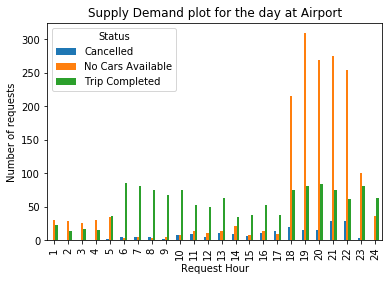

In [34]:
dfGrp1.loc['Airport'].T.plot(kind = 'bar')
plt.ylabel('Number of requests')
plt.title('Supply Demand plot for the day at Airport')

Text(0.5, 1.0, 'Supply Demand plot for the day at City')

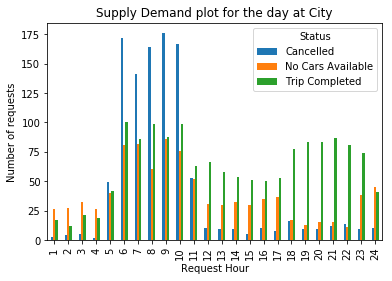

In [35]:
dfGrp1.loc['City'].T.plot(kind = 'bar')
plt.ylabel('Number of requests')
plt.title('Supply Demand plot for the day at City')

Text(0, 0.5, 'Total number of requests')

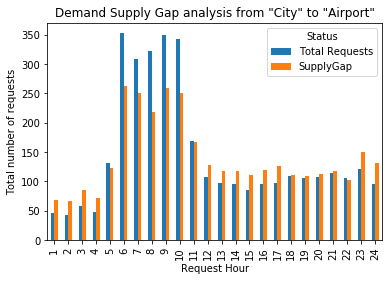

In [41]:
dfGrpCity = dfGrp1.loc['City'].T

dfGrpCity['Total Requests'] = dfGrpCity['Cancelled'] +  dfGrpCity['No Cars Available'] + dfGrpCity['Trip Completed']
dfGrpCity['SupplyGap'] = dfGrpCity['Total Requests'] - dfGrpCity['Cancelled'] +  dfGrpCity['No Cars Available']
dfGrpCity.head()

dfGrpCity.loc[:, ['Total Requests', 'SupplyGap']].plot(kind = 'bar')
plt.title('Demand Supply Gap analysis from "City" to "Airport"')
plt.ylabel('Total number of requests')

Text(0, 0.5, 'Total number of requests')

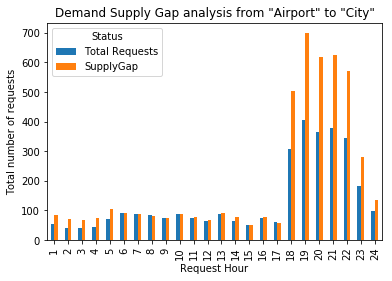

In [42]:
dfGrpAirport = dfGrp1.loc['Airport'].T

dfGrpAirport['Total Requests'] = dfGrpAirport['Cancelled'] +  dfGrpAirport['No Cars Available'] + dfGrpAirport['Trip Completed']
dfGrpAirport['SupplyGap'] = dfGrpAirport['Total Requests'] - dfGrpAirport['Cancelled'] +  dfGrpAirport['No Cars Available']
dfGrpAirport.head()

dfGrpAirport.loc[:, ['Total Requests', 'SupplyGap']].plot(kind = 'bar')
plt.title('Demand Supply Gap analysis from "Airport" to "City"')
plt.ylabel('Total number of requests')